In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1


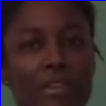

In [3]:
from PIL import Image
import cv2  
import glob
import time
from google.colab.patches import cv2_imshow  
img_number=0
# Load the cascade  
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
#file path
path='/content/drive/MyDrive/preprocessing/'  
all_videos=glob.glob(path + "*mp4")
li=[]
counter=0
for video in all_videos:
  # To capture video from existing video.  
  cap = cv2.VideoCapture(video)  
  counter=counter+1
  print(counter)
  #while True:  
    # Read the frame 
  _, img = cap.read()     
  _, img = cap.read()
  #cv2_imshow(img)  
    # Convert to grayscale  
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
 
    # Detect the faces  
  faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=2)  
  wmax=0
  hmax=0
  ImageFolder ='/content/drive/MyDrive/faceimg/'
    # Draw the rectangle around each face  
  for (x, y, w, h) in faces: 
    if w>wmax and h>hmax:
      wmax=w
      hmax=h
  #print(wmax)
  #print(hmax)
  for (x, y, w, h) in faces: 
    img_number=img_number+1
    if w == wmax and h==hmax : 
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)  
        crop_img = img[y:y+h, x:x+w]
        li.append(crop_img)
        cv2.imwrite("/content/drive/MyDrive/faceimg/"+str("image")+".jpg",crop_img)
        #crop_img = crop_img.save("/content/gdrive/MyDrive/Fake-Face-Detection-DeepFakes-CNN-master/faces/trainimage_"+str(img_number)+".jpg")
        #test=cv2.imwrite('/content/gdrive/MyDrive/Fake-Face-Detection-DeepFakes-CNN-master/faces/train/image_{i}.png',crop_img)
        #print(test)
        
    # Display  
        cv2_imshow(crop_img) 
        #img.save('/content/gdrive/MyDrive/Fake-Face-Detection-DeepFakes-CNN-master/faces/train'+ crop_img , 'JPEG')
    # Stop if escape key is pressed  
  k = cv2.waitKey(1000) & 0xff  
  if k==27:  
        break  
         
# Release the VideoCapture object  
  cap.release()

In [6]:
pickled_model = pickle.load(open('/content/drive/MyDrive/model.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-26 13:58:12        10839
metadata.json                                  2023-02-26 13:58:12           64
variables.h5                                   2023-02-26 13:58:12     12696992
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......batch_normalization_5
.........vars
............0
............1
............2
...

In [7]:
from keras.models import load_model
import cv2
import numpy as np
pickled_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('/content/drive/MyDrive/faceimg/image.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,(96,96))
# img = np.reshape(img,[1,96,96,1])

# image = np.array(Image.open("/content/drive/MyDrive/Fake-Face-Detection-DeepFakes-CNN-master/faces/train/image_1007.jpg").resize((96, 96)))
images_list = []
images_list.append(np.array(gray))
x = np.asarray(images_list)
pr_mask = pickled_model.predict(x).round()

# plt.imshow(
# pr_mask[0]
# )
# plt.show()
print(pr_mask[0])
#classes = pickled_model.predict_classes(img)
#predict_x=pickled_model.predict(img) 
#classes_x=np.argmax(predict_x,axis=1)

#print (predict_x)

1/1 [==============================] - 1s 509ms/step
[1. 0.]
